# Covid-19와 이어지는 내용

In [2]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("Covid19.xlsx")

# Convert the date column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df = df.set_index('Date')

# Resample the daily data to get the weekly sum of cases
df_weekly = df.resample('W').sum()

df_weekly = df_weekly.rename(columns={'Daily': 'Weekly'})

df_weekly = df_weekly[['Weekly']]

print(df_weekly.index[0])

2020-01-26 00:00:00


코드 진행은 유사하므로 설명 생략

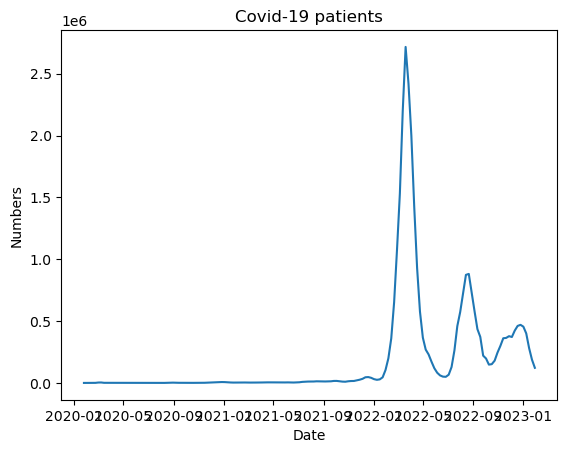

In [2]:
weekly = df_weekly

plt.plot(weekly)
plt.xlabel('Date')
plt.ylabel('Numbers')
plt.title('Covid-19 patients')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

train_size = 140

train_data, test_data = train_test_split(df_weekly, train_size=train_size, shuffle=False)

test_data = test_data.Weekly
train_data = train_data.Weekly

train_data


Date
2020-01-26         3
2020-02-02        12
2020-02-09        10
2020-02-16         4
2020-02-23       573
               ...  
2022-08-28    727583
2022-09-04    579780
2022-09-11    435085
2022-09-18    372048
2022-09-25    220423
Freq: W-SUN, Name: Weekly, Length: 140, dtype: int64

이제 최적의 ARIMA 계수를 찾아서 그래프로 그려서 비교

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
import itertools

warnings.filterwarnings("ignore") # to suppress warnings

p = d = q = range(0, 5) # parameter combinations for ARIMA model
pdq = list(itertools.product(p, d, q))

best_AIC = float("inf") # Initialize the best AIC score as infinity
best_params = None # Initialize the best parameters as None

for param in pdq:
    try:
        model = ARIMA(train_data, order=param)
    
        res = model.fit()
        if res.aic < best_AIC:
                best_AIC = res.aic
                best_params = (param)
    except:
        continue

print("Best ARIMA parameters: ", best_params)


C:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


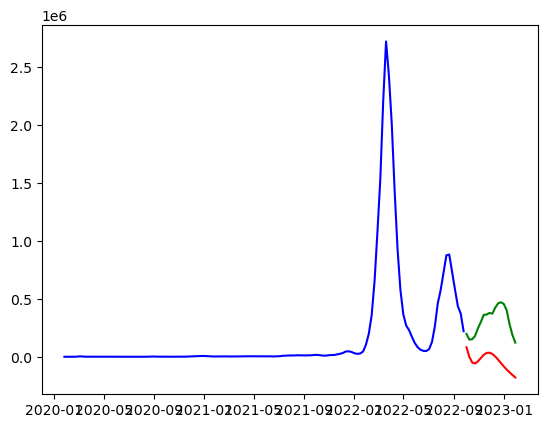

In [4]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(train_data, order=(4,3,3))
model_fit = model.fit()

predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')

plt.plot(train_data, color = 'blue')
plt.plot(test_data, color = 'green')
plt.plot(predictions, color = 'red')

음수가 나와버렸는데 이게 2022년 이전의 데이터들 때문인 것으로 생각된다. 데이터전처리의 중요성이 느껴지는 대목이다. 쓸데없는 데이터를 제거하고 1년치만 사용하기로 했다.

In [5]:
today = df_weekly.index[-1]

cutoff_date = today - pd.DateOffset(years=1)
df_weekly = df_weekly[df_weekly.index >= cutoff_date]

df_weekly

,Weekly
Date,
2022-01-30,104296
2022-02-06,199254
2022-02-13,360283
2022-02-20,652938
2022-02-27,1076272
2022-03-06,1532521
2022-03-13,2199245
2022-03-20,2716593
2022-03-27,2420239


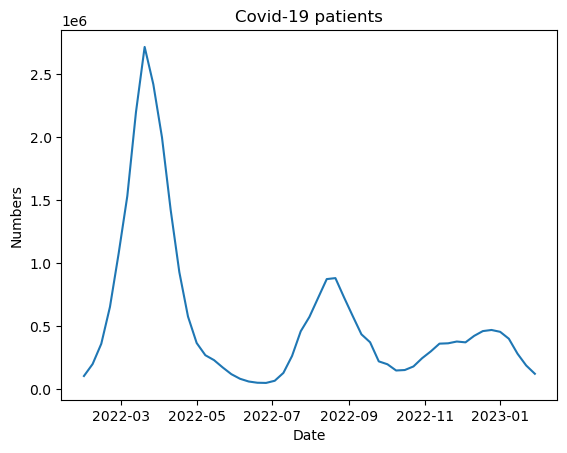

In [6]:
weekly = df_weekly['Weekly']

plt.plot(weekly)
plt.xlabel('Date')
plt.ylabel('Numbers')
plt.title('Covid-19 patients')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

train_size = 45

train_data, test_data = train_test_split(df_weekly, train_size=train_size, shuffle=False)

test_data = test_data.Weekly
train_data = train_data.Weekly

train_data

Date
2022-01-30     104296
2022-02-06     199254
2022-02-13     360283
2022-02-20     652938
2022-02-27    1076272
2022-03-06    1532521
2022-03-13    2199245
2022-03-20    2716593
2022-03-27    2420239
2022-04-03    1998352
2022-04-10    1423192
2022-04-17     928897
2022-04-24     576069
2022-05-01     366169
2022-05-08     269266
2022-05-15     230358
2022-05-22     172315
2022-05-29     118790
2022-06-05      82246
2022-06-12      60580
2022-06-19      50802
2022-06-26      49358
2022-07-03      66416
2022-07-10     128674
2022-07-17     263518
2022-07-24     459440
2022-07-31     573243
2022-08-07     723681
2022-08-14     873616
2022-08-21     881341
2022-08-28     727583
2022-09-04     579780
2022-09-11     435085
2022-09-18     372048
2022-09-25     220423
2022-10-02     197465
2022-10-09     148009
2022-10-16     151735
2022-10-23     180131
2022-10-30     245673
2022-11-06     299601
2022-11-13     361084
2022-11-20     363862
2022-11-27     377987
2022-12-04     371407
Freq:

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
import itertools

warnings.filterwarnings("ignore") # to suppress warnings

p = d = q = range(0, 5) # parameter combinations for ARIMA model
pdq = list(itertools.product(p, d, q))

best_AIC = float("inf") # Initialize the best AIC score as infinity
best_params = None # Initialize the best parameters as None

for param in pdq:
    try:
        model = ARIMA(train_data, order=param)
    
        res = model.fit()
        if res.aic < best_AIC:
                best_AIC = res.aic
                best_params = (param)
    except:
        continue

print("Best ARIMA parameters: ", best_params)


Best ARIMA parameters:  (1, 4, 2)


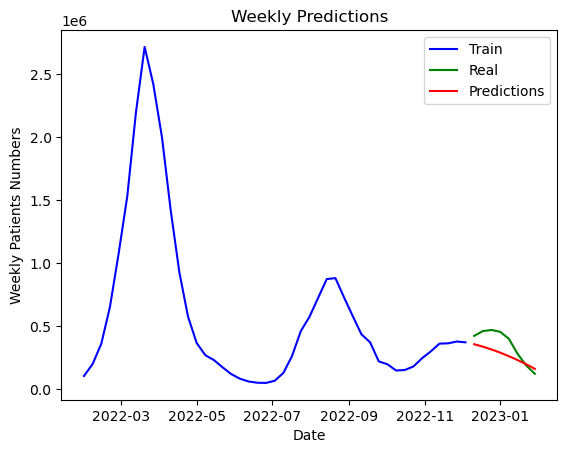

In [9]:
model = ARIMA(train_data, order=(1,4,2))
model_fit = model.fit()

predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')

plt.plot(train_data, label = 'Train', color = 'blue')
plt.plot(test_data, label = 'Real', color = 'green')
plt.plot(predictions, label='Predictions', color = 'red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Weekly Patients Numbers')
plt.title('Weekly Predictions')
plt.show()

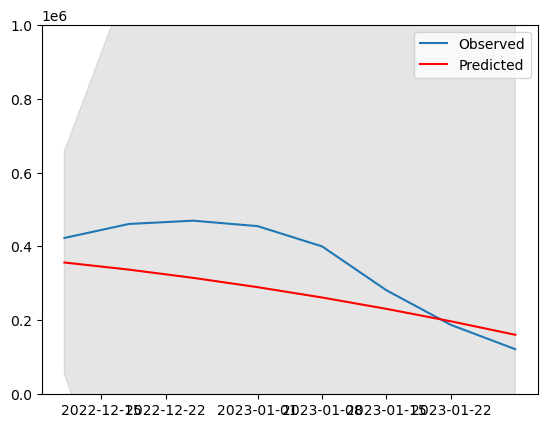

In [10]:
# Generate predictions and calculate confidence interval
pred = model_fit.get_prediction(start=test_data.index[0], end=test_data.index[-1], dynamic=False)
pred_conf = pred.conf_int()

# Plot predictions and fill between the upper and lower bounds of the confidence interval
plt.plot(test_data, label='Observed')
plt.plot(pred.predicted_mean, 'r', label='Predicted')
plt.fill_between(pred_conf.index, pred_conf.iloc[:,0], pred_conf.iloc[:,1], color='gray',alpha=0.2)
plt.ylim(0,1000000)
plt.legend()
plt.show()

그나마 괜찮은 결과가 나왔다. 밑의 잔차분석을 보더라도 Covid-19 에서보다 꽤 정확하게 예측된 것을 볼 수 있다.

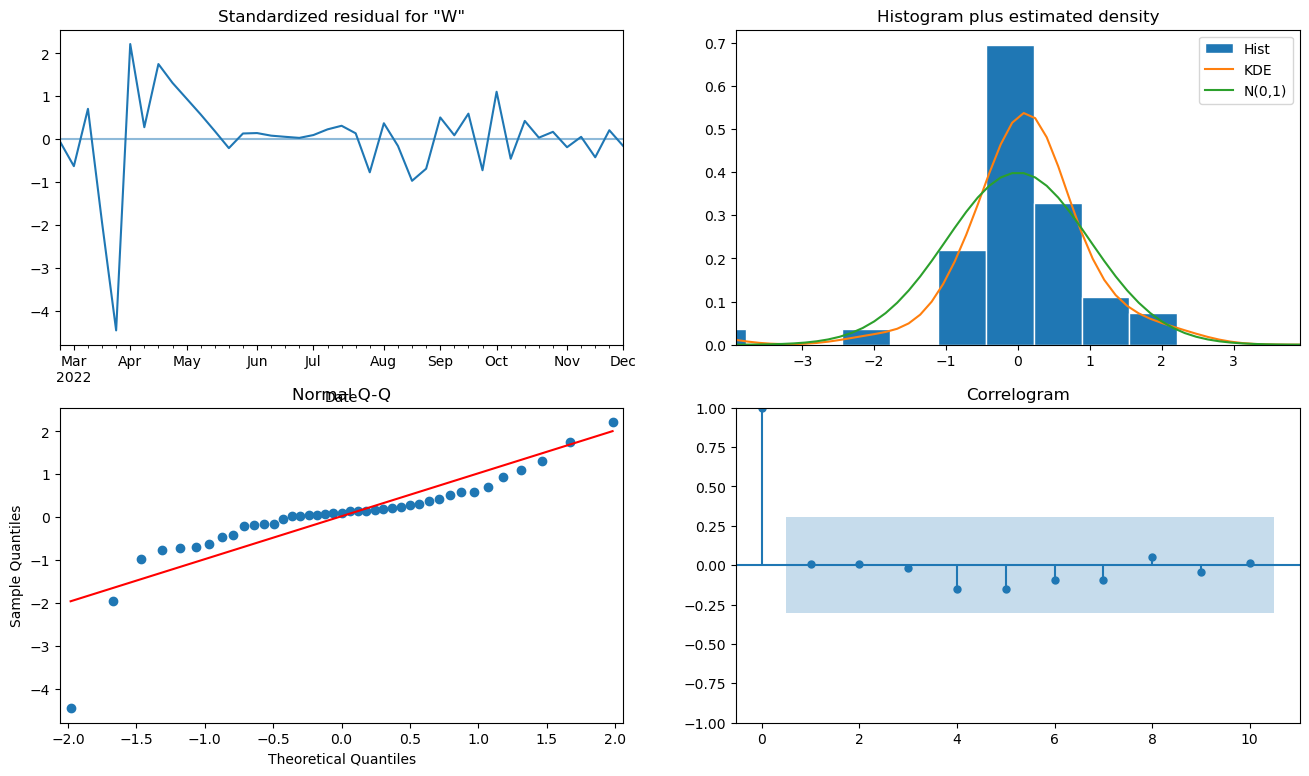

In [11]:
model.fit().plot_diagnostics(figsize = (16,9))
plt.show()

In [12]:
print(model_fit.predict(len(weekly), typ='levels'))

2023-02-05    121397.499961
Freq: W-SUN, dtype: float64


추가로 전체 모델의 모습도 확인해보았다.

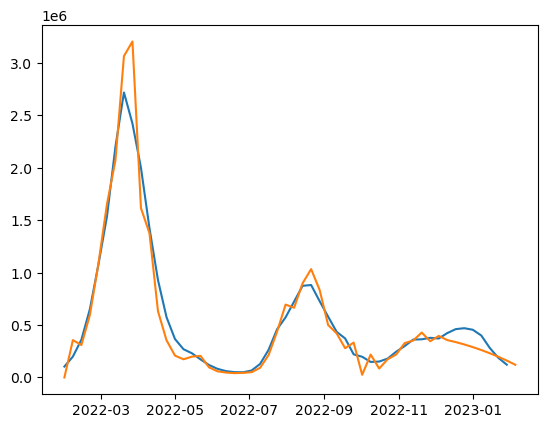

In [13]:
plt.plot(weekly)
plt.plot(model_fit.predict(start=0, end=len(weekly), typ='levels'))

plt.show()

1월 30일부터 2월 5일까지의 확진자를 121397 명으로 예측했다. 한 번 맞는지 지켜봐야겠다.

# Seaborn package 사용

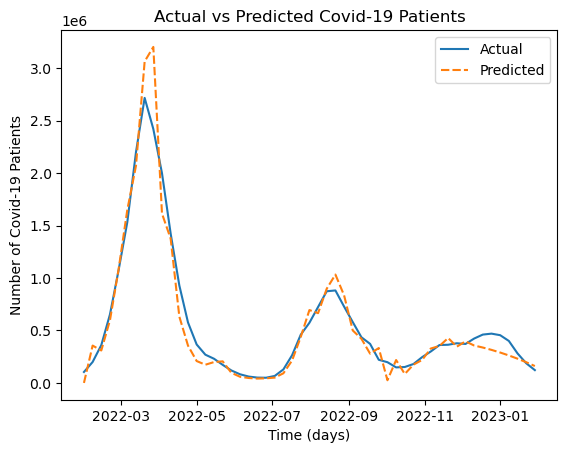

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


prediction_total = model_fit.predict(start=0, end=len(weekly)-1, typ='levels')
# Combine the actual values and the predicted values into a single dataframe
df_predict = pd.DataFrame({'Actual': weekly, 'Predicted': prediction_total})

# Plot the actual and predicted values using the lineplot function
sns.lineplot(data=df_predict)

# Add labels and title to the plot
plt.xlabel('Time (days)')
plt.ylabel('Number of Covid-19 Patients')
plt.title('Actual vs Predicted Covid-19 Patients')

# Show the plot
plt.show()

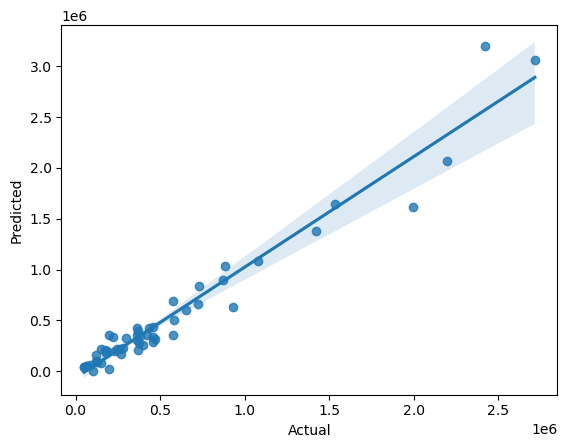

In [15]:
sns.regplot(x='Actual', y='Predicted', data=df_predict)

plt.show()

regplot을 그려본 결과 대체로 일직선 위에 데이터들이 위치하는 것을 확인할 수 있었음. => 어느정도 잘 추측할 수 있음.

# 로지스틱 회귀분석

코로나 확진자를 로지스틱회귀분석을 통해 다음날 확진자가 늘어날지 줄어들지 예측해보는 코드를 짜봄

Accuracy score: 0.2727272727272727
Confusion matrix:
 [[0 8]
 [0 3]]


<AxesSubplot:title={'center':'Confusion Matrix of Patients Prediction'}>

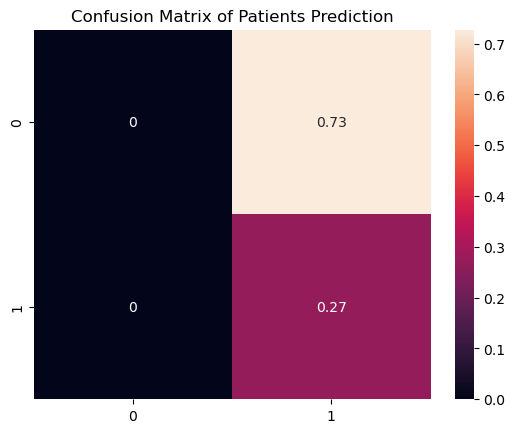

In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Get the values for the target variable, which is whether the number of confirmed cases tomorrow is more than today
target = (weekly.diff() > 0).astype(int)

# Remove the first row from the data, as there is no previous day to compare the first day's confirmed cases to
data = weekly.iloc[1:]
target = target.iloc[1:]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

#Reshaping for 2D array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1,1)
X_test= X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Train the Logistic Regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy score and confusion matrix
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

plt.title("Confusion Matrix of Patients Prediction")
sns.heatmap(confusion_matrix(y_test, y_pred,normalize="pred",), annot=True)


분석 결과 아주 좋지 않은 결과가 나왔음. 1에 가까울수록 좋지만 겨우 0.27 정도만 맞출 수 있었음. 코로나 확진자의 증감을 예측하는 것은 더욱 어려운 일이라고 생각됨.